In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv('laptop_price.csv',encoding='latin-1',index_col='laptop_ID')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [5]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
df=pd.concat([df,pd.get_dummies(df['Company'],prefix="company")],axis=1)
df=df.drop('Company',axis=1)
df.head(1)

,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,company_LG,company_Lenovo,company_MSI,company_Mediacom,company_Microsoft,company_Razer,company_Samsung,company_Toshiba,company_Vero,company_Xiaomi
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df['Product'].value_counts()

XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: Product, Length: 618, dtype: int64

In [8]:
df=df.drop("Product",axis=1)
df.head(1)

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,company_LG,company_Lenovo,company_MSI,company_Mediacom,company_Microsoft,company_Razer,company_Samsung,company_Toshiba,company_Vero,company_Xiaomi
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [10]:
df=pd.concat([df,pd.get_dummies(df["TypeName"],prefix='typename')],axis=1)
df=df.drop("TypeName",axis=1)
df.head(1)

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,...,company_Samsung,company_Toshiba,company_Vero,company_Xiaomi,typename_2 in 1 Convertible,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
df['ScreenResolution']=df['ScreenResolution'].str.split(' ').apply(lambda x:x[-1])
df['screen_width']=df['ScreenResolution'].str.split('x').apply(lambda x:int(x[0]))
df['screen_height']=df['ScreenResolution'].str.split('x').apply(lambda x: int(x[1]))
df=df.drop('ScreenResolution',axis=1)
df.head(1)

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,...,company_Vero,company_Xiaomi,typename_2 in 1 Convertible,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,0,0,1,0,2560,1600


In [12]:
df['cpu_company']=df['Cpu'].str.split(' ').apply(lambda x:x[0])
df['cpu_speed']=df['Cpu'].str.split(' ').apply(lambda x:x[-1])
df=df.drop('Cpu',axis=1)
df.head(1)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,...,typename_2 in 1 Convertible,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_company,cpu_speed
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz


In [13]:
df['cpu_company'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_company, dtype: int64

In [14]:
pd.get_dummies(df['cpu_company'],prefix='cpu_company')

,cpu_company_AMD,cpu_company_Intel,cpu_company_Samsung
laptop_ID,,,
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
...,...,...,...
1316,0,1,0
1317,0,1,0
1318,0,1,0


In [15]:
df=pd.concat([df,pd.get_dummies(df['cpu_company'],prefix='cpu_company')],axis=1)
df=df.drop('cpu_company',axis=1)
df.head(1)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,...,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel,cpu_company_Samsung
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,...,0,0,1,0,2560,1600,2.3GHz,0,1,0


In [16]:
df['cpu_speed']=df['cpu_speed'].apply(lambda x:float(x[:-3]))
df.head(1)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,...,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel,cpu_company_Samsung
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,...,0,0,1,0,2560,1600,2.3,0,1,0


In [17]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [18]:
df['Ram']=df['Ram'].apply(lambda x:int(x[:-2]))
df.head(1)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,...,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel,cpu_company_Samsung
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,...,0,0,1,0,2560,1600,2.3,0,1,0


In [19]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [20]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [21]:
def func(x,type:str):
    lis=[]
    x=x.split('+')
    for storage in x:
        temp=storage.split(' ')
        for i in range(len(temp)):
            if temp[i]==type:
                return temp[i-1]
    return "0GB"
df['memory_ssd']=df['Memory'].apply(func,args=['SSD'])
df['memory_hdd']=df['Memory'].apply(func,args=['HDD'])
df['memory_flash']=df['Memory'].apply(func,args=['Flash'])
df['memory_hybrid']=df['Memory'].apply(func,args=['Hybrid'])

In [22]:
def func(x):
    if x[-2:]=='TB':
        return float(x[:-2])*1024
    else:
        return float(x[:-2])
for memory_type in ['memory_ssd','memory_hdd','memory_flash','memory_hybrid']:
    df[memory_type]=df[memory_type].apply(func)
df=df.drop('Memory',axis=1)
df.head(1)

,Inches,Ram,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Chuwi,...,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel,cpu_company_Samsung,memory_ssd,memory_hdd,memory_flash,memory_hybrid
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,0,...,2560,1600,2.3,0,1,0,128.0,0.0,0.0,0.0


In [23]:
df['Gpu']=df['Gpu'].str.split(' ').apply(lambda x:x[0])
df['Gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu, dtype: int64

In [24]:
df=pd.concat([df,pd.get_dummies(df['Gpu'],prefix='gpu')],axis=1)
df=df.drop('Gpu',axis=1)
df.head(1)

,Inches,Ram,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Chuwi,company_Dell,...,cpu_company_Intel,cpu_company_Samsung,memory_ssd,memory_hdd,memory_flash,memory_hybrid,gpu_AMD,gpu_ARM,gpu_Intel,gpu_Nvidia
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8,macOS,1.37kg,1339.69,0,1,0,0,0,...,1,0,128.0,0.0,0.0,0.0,0,0,1,0


In [25]:
df=pd.concat([df,pd.get_dummies(df['OpSys'],prefix='opsys')],axis=1)
df=df.drop('OpSys',axis=1)
df.head(1)

,Inches,Ram,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Fujitsu,...,gpu_Nvidia,opsys_Android,opsys_Chrome OS,opsys_Linux,opsys_Mac OS X,opsys_No OS,opsys_Windows 10,opsys_Windows 10 S,opsys_Windows 7,opsys_macOS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8,1.37kg,1339.69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df['Weight']=df['Weight'].apply(lambda x:float(x[:-2]))
df.head(1)

,Inches,Ram,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Fujitsu,...,gpu_Nvidia,opsys_Android,opsys_Chrome OS,opsys_Linux,opsys_Mac OS X,opsys_No OS,opsys_Windows 10,opsys_Windows 10 S,opsys_Windows 7,opsys_macOS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8,1.37,1339.69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df.columns

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'company_Acer',
       'company_Apple', 'company_Asus', 'company_Chuwi', 'company_Dell',
       'company_Fujitsu', 'company_Google', 'company_HP', 'company_Huawei',
       'company_LG', 'company_Lenovo', 'company_MSI', 'company_Mediacom',
       'company_Microsoft', 'company_Razer', 'company_Samsung',
       'company_Toshiba', 'company_Vero', 'company_Xiaomi',
       'typename_2 in 1 Convertible', 'typename_Gaming', 'typename_Netbook',
       'typename_Notebook', 'typename_Ultrabook', 'typename_Workstation',
       'screen_width', 'screen_height', 'cpu_speed', 'cpu_company_AMD',
       'cpu_company_Intel', 'cpu_company_Samsung', 'memory_ssd', 'memory_hdd',
       'memory_flash', 'memory_hybrid', 'gpu_AMD', 'gpu_ARM', 'gpu_Intel',
       'gpu_Nvidia', 'opsys_Android', 'opsys_Chrome OS', 'opsys_Linux',
       'opsys_Mac OS X', 'opsys_No OS', 'opsys_Windows 10',
       'opsys_Windows 10 S', 'opsys_Windows 7', 'opsys_macOS'],
      dtype='ob

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

[]

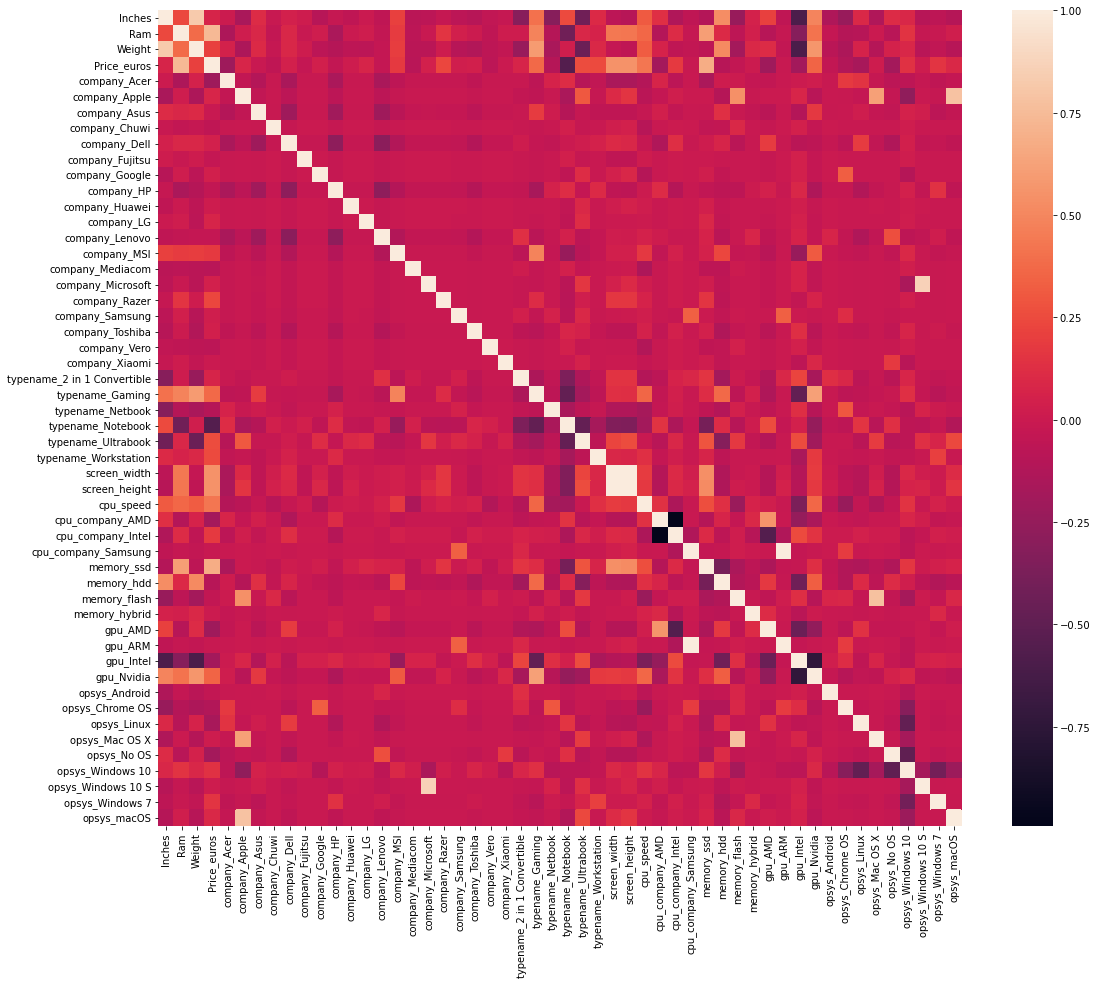

In [29]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=False)
plt.plot()

In [30]:
max_corr=df.corr()['Price_euros'].apply(lambda x:abs(x)).sort_values(ascending=False,axis=0)

In [31]:
max_corr.iloc[:25]

Price_euros             1.000000
Ram                     0.743007
memory_ssd              0.675986
screen_width            0.556529
screen_height           0.552809
typename_Notebook       0.549248
cpu_speed               0.430293
typename_Gaming         0.375789
gpu_Nvidia              0.348797
typename_Ultrabook      0.255658
typename_Workstation    0.249752
company_Razer           0.233756
Weight                  0.210370
company_Acer            0.208349
gpu_AMD                 0.199415
gpu_Intel               0.184205
cpu_company_Intel       0.181127
cpu_company_AMD         0.180111
company_MSI             0.180100
opsys_No OS             0.177094
opsys_Linux             0.162060
opsys_Windows 7         0.152381
opsys_Windows 10        0.137048
opsys_Chrome OS         0.118684
typename_Netbook        0.097572
Name: Price_euros, dtype: float64

In [32]:
max_corr_cols=max_corr.index
# decreasing indexes decreases accuracy
# max_corr_cols=max_corr.iloc[:30].index
max_corr_cols

Index(['Price_euros', 'Ram', 'memory_ssd', 'screen_width', 'screen_height',
       'typename_Notebook', 'cpu_speed', 'typename_Gaming', 'gpu_Nvidia',
       'typename_Ultrabook', 'typename_Workstation', 'company_Razer', 'Weight',
       'company_Acer', 'gpu_AMD', 'gpu_Intel', 'cpu_company_Intel',
       'cpu_company_AMD', 'company_MSI', 'opsys_No OS', 'opsys_Linux',
       'opsys_Windows 7', 'opsys_Windows 10', 'opsys_Chrome OS',
       'typename_Netbook', 'memory_hdd', 'opsys_macOS', 'company_Mediacom',
       'company_Apple', 'typename_2 in 1 Convertible', 'company_Vero',
       'Inches', 'company_LG', 'company_Chuwi', 'company_Dell',
       'company_Microsoft', 'company_HP', 'memory_flash', 'company_Toshiba',
       'opsys_Android', 'company_Google', 'company_Samsung', 'company_Lenovo',
       'company_Fujitsu', 'gpu_ARM', 'cpu_company_Samsung',
       'opsys_Windows 10 S', 'company_Huawei', 'opsys_Mac OS X',
       'company_Asus', 'memory_hybrid', 'company_Xiaomi'],
      dtype='ob

In [33]:
selected_df=df[max_corr_cols]
selected_df

,Price_euros,Ram,memory_ssd,screen_width,screen_height,typename_Notebook,cpu_speed,typename_Gaming,gpu_Nvidia,typename_Ultrabook,...,company_Lenovo,company_Fujitsu,gpu_ARM,cpu_company_Samsung,opsys_Windows 10 S,company_Huawei,opsys_Mac OS X,company_Asus,memory_hybrid,company_Xiaomi
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,1339.69,8,128.0,2560,1600,0,2.3,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0
2,898.94,8,0.0,1440,900,0,1.8,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0
3,575.00,8,256.0,1920,1080,1,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
4,2537.45,16,512.0,2880,1800,0,2.7,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0
5,1803.60,8,256.0,2560,1600,0,3.1,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,638.00,4,128.0,1920,1080,0,2.5,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0
1317,1499.00,16,512.0,3200,1800,0,2.5,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0
1318,229.00,2,0.0,1366,768,1,1.6,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0


[]

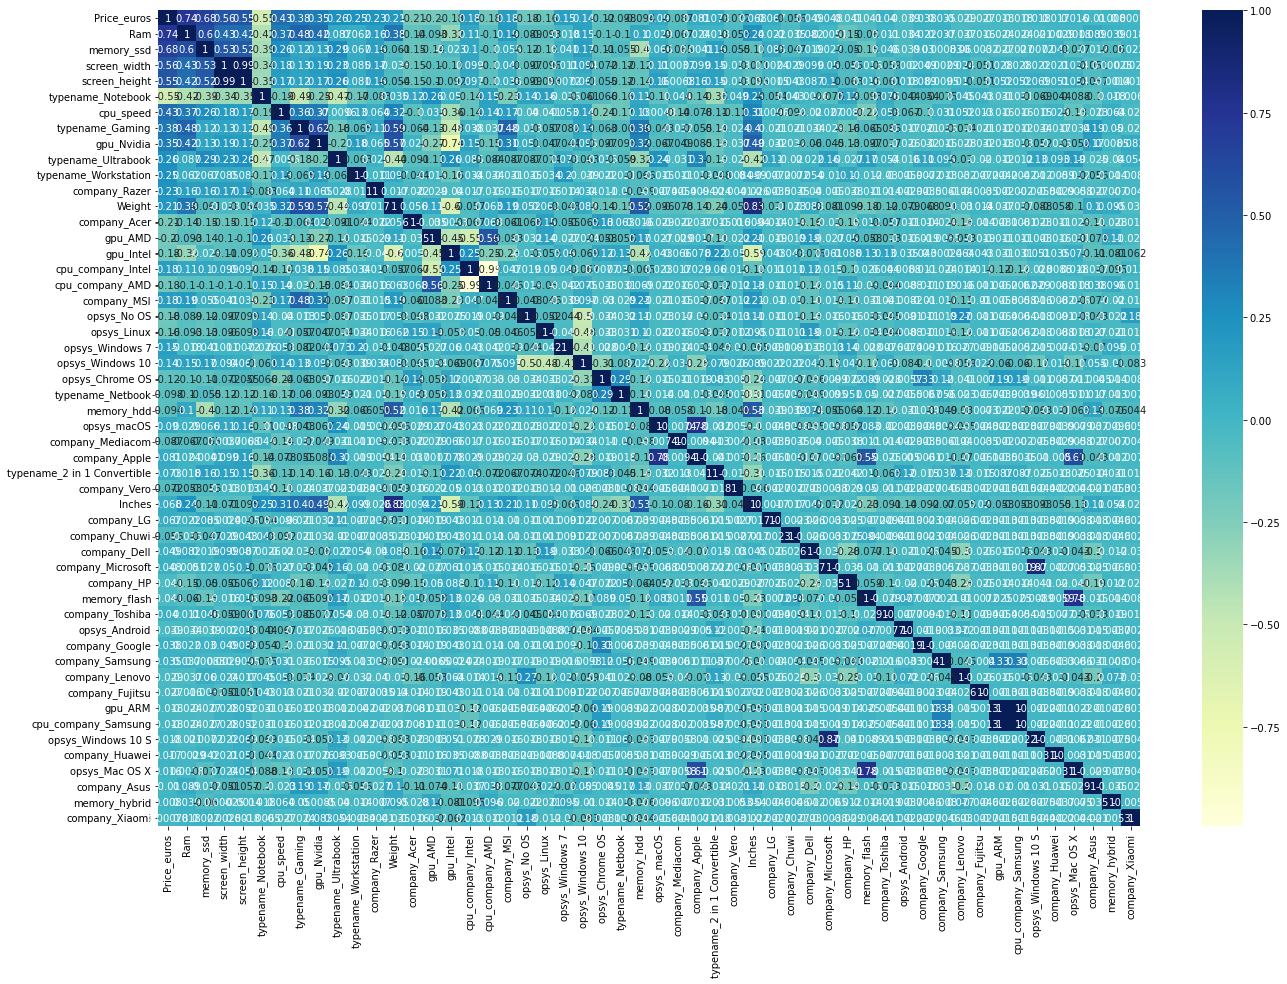

In [34]:
plt.figure(figsize=(22,15))
sns.heatmap(selected_df.corr(),annot=True,cmap=plt.cm.YlGnBu)
plt.plot()

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [36]:
x,y=selected_df.drop('Price_euros',axis=1),selected_df['Price_euros']
x.sort_index(axis=1,inplace=True)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,shuffle=True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1107, 51), (196, 51), (1107,), (196,))

In [38]:
scalar=StandardScaler()
x_train_transform=scalar.fit_transform(x_train)
x_test_transform=scalar.transform(x_test)

In [39]:
x_train_transform_df=pd.DataFrame(x_train_transform,columns=x.columns)
x_test_transform_df=pd.DataFrame(x_test_transform,columns=x.columns)

In [40]:
regressor=XGBRegressor()
regressor.fit(x_train_transform_df,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
regressor.score(x_test_transform_df,y_test)

0.8156526034274755

[]

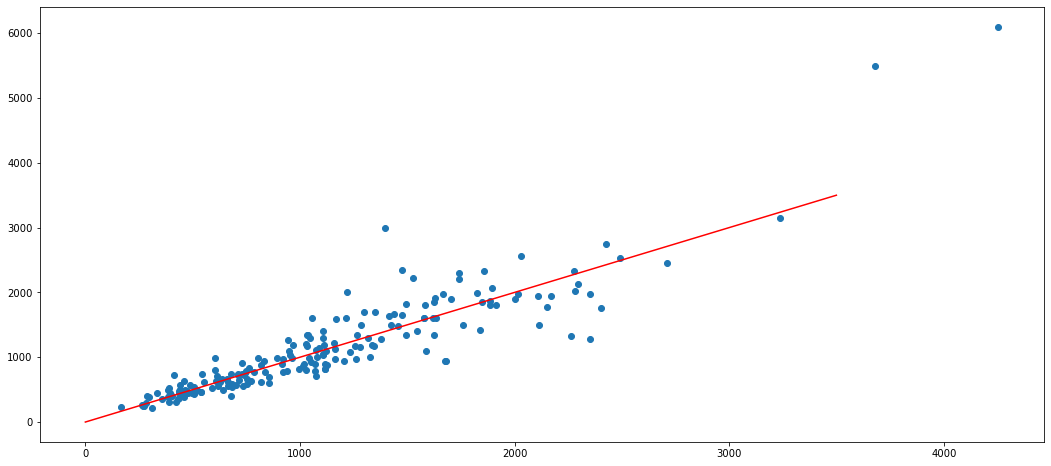

In [42]:
y_pred=regressor.predict(x_test_transform_df)
plt.figure(figsize=(18,8))
plt.scatter(y_pred,y_test)
plt.plot(np.arange(0,3500),np.arange(0,3500),c='red')
plt.plot()

In [43]:
data=scalar.transform([x_test.iloc[0]])
regressor.predict(data),y_test.iloc[0]

c:\Users\sagni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(array([388.20557], dtype=float32), 398.49)

In [44]:
import pickle

with open('laptop_prices_model.h5','wb') as f:
    pickle.dump(regressor,f)
with open('scalar.h5','wb') as f:
    pickle.dump(scalar,f)

In [45]:
with open('laptop_prices_model.h5','rb') as f:
    regressor=pickle.load(f)
regressor.score(x_test_transform_df,y_test)

0.8156526034274755

In [46]:
idx=3
data=scalar.transform([x_train.iloc[idx]])
regressor.predict(data),y_train.iloc[idx]

c:\Users\sagni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(array([1216.6765], dtype=float32), 1200.0)